In [32]:
import numpy as np
import imageio as im
import glob, sys, os, random
import matplotlib.pyplot as plt

### Get the list of image filenames and their labels
This is the starting point.


In [33]:
def get_fileslist_with_labels(main_folder, number_of_images):
    # Make a list of lists of files for each label
    filelists = []
    for label in range(0,10):
        filelist = []
        filelists.append(filelist);
        dir_name = os.path.join(main_folder, chr(ord('A') + label))
        for file in os.listdir(dir_name):
            if (file.endswith('.png')):
                fullname = os.path.join(dir_name, file)
#                 print("filename",fullname)
                if (os.path.getsize(fullname) > 0):
                    filelist.append(fullname)
                else:
                    print('file ' + fullname + ' is empty')
        # sort each list of files so they start off in the same order
        # regardless of how the order the OS returns them in
        filelist.sort()

    # Take the specified number of items for each label and
    # build them into an array of (label, filename) pairs
    # Since we seeded the RNG, we should get the same sample each run
#     print(len(filelists))
    labelsAndFiles = []
    for label in range(0,10):
        filelist = random.sample(filelists[label], number_of_images)
        for filename in filelist:
            labelsAndFiles.append((label, filename))

    return labelsAndFiles

In [34]:
labelsAndFiles_small = get_fileslist_with_labels("notMNIST_small", 1010)
print(len(labelsAndFiles_small))

file notMNIST_small\A\RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png is empty
file notMNIST_small\F\Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png is empty
10100


In [39]:
labelsAndFiles_large = get_fileslist_with_labels("notMNIST_large", 20000)
# print(len(labelsAndFiles_large))

file notMNIST_large\A\SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png is empty
file notMNIST_large\A\Um9tYW5hIEJvbGQucGZi.png is empty
file notMNIST_large\B\TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png is empty
file notMNIST_large\D\VHJhbnNpdCBCb2xkLnR0Zg==.png is empty


#### Get the data of images and labels from the filenames returned in the last step
return_img_lab_arrays will split the labels and filenames and will return the results of labels and image data seperately.

In [35]:
def return_img_lab_arrays(labelsAndFiles):

    images = []
    labels = []
    for i in range(0, len(labelsAndFiles)):
        # display progress, since this can take a while
        if (i % 100 == 0):
            sys.stdout.write("\r%d%% complete" % ((i * 100)/len(labelsAndFiles)))
            sys.stdout.flush()
        filename = labelsAndFiles[i][1]
#         print("filename",filename)
        try:
            image = im.imread(filename)
            images.append(image)
            labels.append(labelsAndFiles[i][0])
        except:
            # If this happens we won't have the requested number
            print("\nCan't read image file " + filename)
    count = len(images)
#     print("count of images abd labels",count,len(images))
#     print("number of files",len(labelsAndFiles))
    imagedata = np.zeros((count,28,28), dtype=np.uint8)
    labeldata = np.zeros(count, dtype=np.uint8)

    for i in range(len(labelsAndFiles)):
#         print(i)
        imagedata[i] = images[i]
        labeldata[i]= labels[i]
    print("\n")
    return imagedata, labeldata
#     return "s","s"

In [36]:
random.shuffle(labelsAndFiles_small)
imagedata_small, labeldata_small = return_img_lab_arrays(labelsAndFiles_small)

99% complete



In [37]:
print(len(imagedata_small))

10100


10100
2


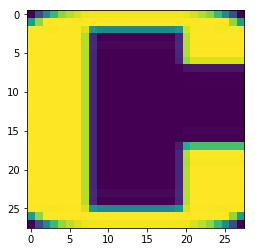

In [38]:
print(len(labelsAndFiles_small))
print(labeldata_small[0])
labelsAndFiles_small[0]
plt.imshow(imagedata_small[0])
plt.show()

In [41]:
random.shuffle(labelsAndFiles_large)
imagedata_large, labeldata_large = return_img_lab_arrays(labelsAndFiles_large)

99% complete



### Check Files and Labels

In [42]:
print(len(labelsAndFiles_large))
# print(labeldata_large[0])
labelsAndFiles_large[0]

200000


(0, 'notMNIST_large\\A\\S25vY2tvdXQtSFRGNjgtRnVsbEZlYXRoZXJ3dC5vdGY=.png')

200000
6


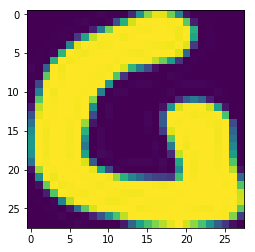

In [43]:
print(len(labelsAndFiles_large))
print(labeldata_large[100])
labelsAndFiles_large[100]
plt.imshow(imagedata_large[100])
plt.show()

#### makefile_labeldata function will create the files that would contain the labels. 
It would be called twice. One for notMNIST_small and one for notMNIST_large

In [143]:
def makefile_labeldata(labeldata, outputfile):
    header = np.array([0x0801, len(labeldata)], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(labeldata.tobytes())

### makefile_imagedata function will create the files that would contain the images. 
It would be called twice. One for notMNIST_small and one for notMNIST_large

In [45]:
def makefile_imagedata(imagedata, outputfile):
    header = np.array([0x0803, len(imagedata), 28, 28], dtype='>i4')
    with open(outputfile, "wb") as f:
        f.write(header.tobytes())
        f.write(imagedata.tobytes())

In [47]:
makefile_labeldata(labeldata_small, "data/t10k-labels-idx1-ubyte")
makefile_imagedata(imagedata_small, "data/t10k-images-idx3-ubyte")
#python convert_to_mnist_format.py notMNIST_small 1000 data/t10k-labels-idx1-ubyte data/t10k-images-idx3-ubyte

In [48]:
makefile_labeldata(labeldata_large, "data/train-labels-idx1-ubyte")
makefile_imagedata(imagedata_large, "data//train-images-idx3-ubyte")
## $ python convert_to_mnist_format.py notMNIST_large 6000 data/train-labels-idx1-ubyte data/train-images-idx3-ubyte


In [49]:
list_files=os.listdir("data")
list_files

['t10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

## ZIP THE FILES
### Files name match the name of MNIST DATASET

In [50]:
import gzip
import shutil
with open('data/t10k-labels-idx1-ubyte', 'rb') as f_in:
    with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [51]:
with open('data/t10k-images-idx3-ubyte', 'rb') as f_in:
    with gzip.open('data/t10k-images-idx3-ubyte.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [52]:
with open('data/train-labels-idx1-ubyte', 'rb') as f_in:
    with gzip.open('data/train-labels-idx1-ubyte.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [53]:
with open('data/train-images-idx3-ubyte', 'rb') as f_in:
    with gzip.open('data/train-images-idx3-ubyte.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)